<a href="https://colab.research.google.com/github/lover-swan/project2_2/blob/main/(4)EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_pickle('/content/drive/MyDrive/project2_2/data_after.pkl')

In [48]:
data.to_csv('/content/drive/MyDrive/data.csv',index=False)

In [4]:
data.columns

Index(['event_time', 'user_id', 'product_id', 'large_category',
       'small_category', 'brand', 'price', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 8 columns):
 #   Column          Dtype   
---  ------          -----   
 0   event_time      int32   
 1   user_id         int32   
 2   product_id      int32   
 3   large_category  category
 4   small_category  category
 5   brand           category
 6   price           int16   
 7   target          int8    
dtypes: category(3), int16(1), int32(3), int8(1)
memory usage: 769.2 MB


In [6]:
data.large_category.describe()

count        28933155
unique             13
top       electronics
freq         16135623
Name: large_category, dtype: object

In [7]:
data.small_category.describe()

count       28933155
unique           124
top       smartphone
freq        11507231
Name: small_category, dtype: object

In [8]:
data.brand.describe()

count     36331684
unique        3444
top        samsung
freq       5282775
Name: brand, dtype: object

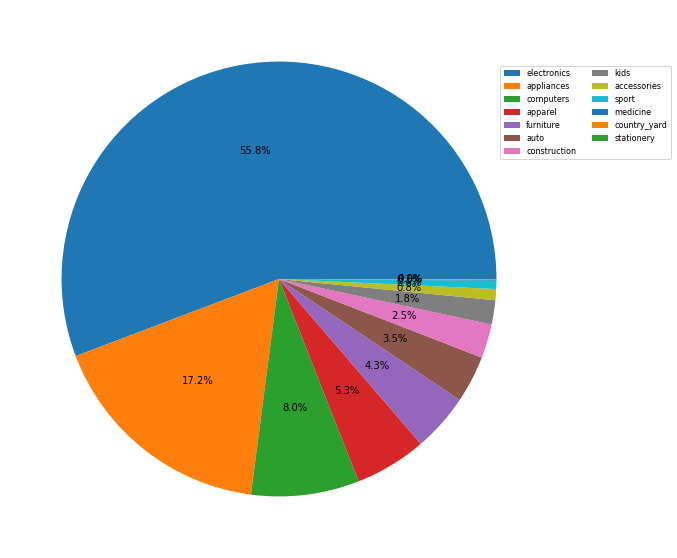

In [27]:
plt.figure(figsize=(10,10))
plt.pie(data.large_category.value_counts(),autopct='%.1f%%')
plt.legend(ncol=2,fontsize=8,bbox_to_anchor=(0.9, 0.9),labels=data.large_category.value_counts().index)
plt.show()

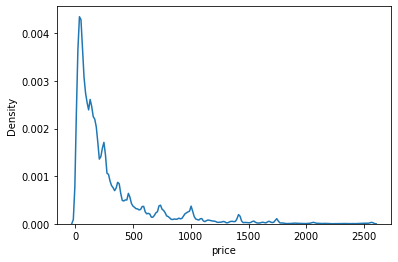

In [ ]:
sns.kdeplot(data.price)

In [ ]:
# 데이터를 카테고리 별로 묶어서 분할 

In [ ]:
category_list=list(data['large_category'].unique())

In [ ]:
category_list

[nan,
 'appliances',
 'furniture',
 'computers',
 'electronics',
 'apparel',
 'construction',
 'auto',
 'kids',
 'sport',
 'accessories',
 'medicine',
 'stationery',
 'country_yard']

In [ ]:
target_data1=data[data.large_category.isin(['electronics','appliances','computers','auto'])].reset_index(drop=True)
target_data2=data[data.large_category.isin(['furniture','construction','country_yard'])].reset_index(drop=True)
target_data3=data[data.large_category.isin(['apparel','accessories','sport'])].reset_index(drop=True)
target_data4=data[data.large_category.isin(['kids','medicine','stationery'])].reset_index(drop=True)
target_data5=data[data.large_category.isna()].reset_index(drop=True)

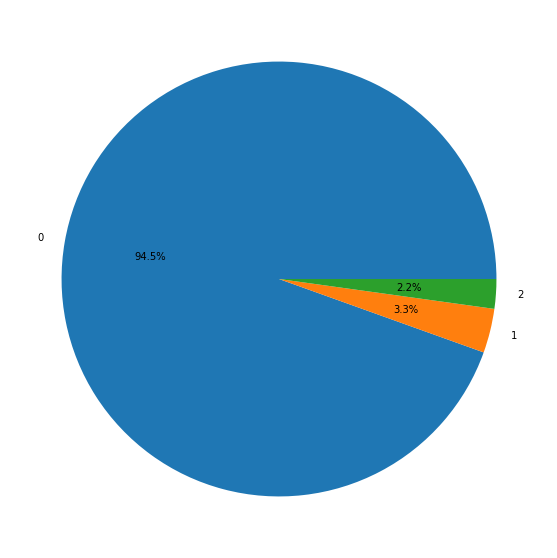

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(target_data1.target.value_counts(),labels=target_data1.target.value_counts().index,autopct='%.1f%%')
plt.show()

In [ ]:
target_data1

,event_time,user_id,product_id,large_category,small_category,brand,price,target
0,1569888000,554748717,3900821,appliances,water_heater,aqua,33,0
1,1569888001,550050854,1307067,computers,notebook,lenovo,251,0
2,1569888004,535871217,1004237,electronics,smartphone,apple,1081,0
3,1569888005,512742880,1480613,computers,desktop,pulser,908,0
4,1569888011,537918940,1004545,electronics,smartphone,huawei,566,0
...,...,...,...,...,...,...,...,...
24440244,1572566398,518956209,1004870,electronics,smartphone,samsung,275,0
24440245,1572566398,524356542,2702331,appliances,refrigerators,lg,527,0
24440246,1572566398,537931532,2300275,electronics,video,gopro,527,0
24440247,1572566398,566280422,5701038,auto,player,kenwood,128,0


In [ ]:
def preprocessing(df):
  df=df[['user_id','product_id','target']]
  df=df.drop_duplicates().reset_index(drop=True)

  return df

In [ ]:
target_data1=preprocessing(target_data1)
target_data2=preprocessing(target_data2)
target_data3=preprocessing(target_data3)
target_data4=preprocessing(target_data4)
target_data5=preprocessing(target_data5)

In [ ]:
target_data1.to_pickle('/content/drive/MyDrive/project2_2/target_data1.pkl')
target_data2.to_pickle('/content/drive/MyDrive/project2_2/target_data2.pkl')
target_data3.to_pickle('/content/drive/MyDrive/project2_2/target_data3.pkl')
target_data4.to_pickle('/content/drive/MyDrive/project2_2/target_data.pkl')
target_data5.to_pickle('/content/drive/MyDrive/project2_2/target_data1.pkl')